### DSGE - Perturbation Methods

In [5]:
import scipy.optimize as opt
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

#### Exercise 2

In [57]:
#Parameters
alpha = .33
k = 10
z = 1
b = 2
t = .1
h = 24

# Function to characterize wages
def wage(w, k):
    nd = ((1-alpha)*z/w)**(1/alpha)*k
    pi = z*k**alpha*nd**(1-alpha) - w*nd
    ns = h - b/(w*(1+b))*(w*h + pi - t)
    return nd - ns

wage5 = lambda w: wage(w,k)
wagebar = opt.root(wage5, 0.1).x[0]
print("Equilibrium Wage = ", wagebar)

Equilibrium Wage =  0.789303333896


In [58]:
# Generating First and Second Order Approximation
eps = 1e-2
wageeps = lambda w: wage(w, k+eps)
wageneps = lambda w: wage(w, k-eps)
wagebareps = opt.root(wage5eps, 0.1).x[0]
wagebarneps = opt.root(wage5neps, 0.1).x[0]

wprime = (wagebareps - wagebarneps)/(2*eps)
wprimeprime = (wagebareps - 2*wagebar + wagebarneps)/(eps**2)

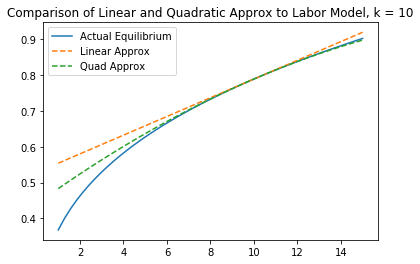

In [59]:
# Plotting Actual Solution on a grid
kgrid = np.linspace(1, 15, 50)
wgrid = np.empty_like(kgrid)
for i in range(len(kgrid)):
    wagetemp = lambda w: wage(w, kgrid[i])
    wgrid[i] = opt.root(wagetemp, 0.1).x[0]
    
wlin = wagebar + wprime*(kgrid - k)
wquad = wlin + 0.5*wprimeprime*(kgrid - k)**2

plt.plot(kgrid, wgrid, label="Actual Equilibrium")
plt.plot(kgrid, wlin, "--", label ="Linear Approx")
plt.plot(kgrid, wquad, "--", label="Quad Approx")
plt.title("Comparison of Linear and Quadratic Approx to Labor Model, k = "+ str(k))
plt.legend()
plt.show()

# We can repeat this exercise by simply replacing k with 10

#### Exercise 3

In [82]:
y100 = 47.465787535327919

Fx = lambda x: .35*x**(-.65) + .9
Fy = lambda y: -1 - .95**(-.4)*(.35*y**(-.65) + .9)
Fxx = lambda x: .35*(-.65)*x**(-1.65)
Fyy = lambda y: .95**(-.4)*.35*(-.65)*y**(-1.65) 
Fxxx = lambda x: .35*(-.65)*(-1.65)*x**(-2.65)
Fyyy = lambda y: .95**(-.4)*.35*(-.65)*(-1.65)*y**(-2.65)

Gx = - Fx(100)/Fy(y100)
Gxx = -(Fyy(y100)*Gx**2 + Fxx(100))/(Fy(y100))
Gxxx = -(Fyyy(y100)*Gx**2 + Fxxx(100))/(Fy(y100))

print("Functional Form of Polynomial is: " + str(y100 + 100*Gx + 100**2*Gxx/2 + 100**3*Gxxx/6) + "" + 
      str(Gx + 200*Gxx/2 + 30000*Gxxx/6) + "x + " 
      + str(Gxx/2 + 300*Gxxx/6) + "x^2 + " 
      + str(Gxxx/6) + "x^3")

Functional Form of Polynomial is: 94.478585451607690.4734077384263557x + 7.516790929001357e-05x^2 + 4.2370316654432276e-07x^3


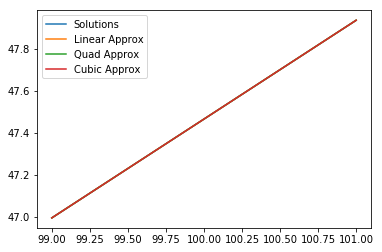

In [80]:
# Now we can plot our model.
xgrid = np.linspace(99,101, 50)
ygrid = np.empty_like(xgrid)

for i in range(len(xgrid)):
    ftemp = lambda y: (xgrid[i]**(.35) + .9*xgrid[i] - y)**(-2.5) - .95*(y**(.35) + .9*y)**(-2.5)
    ygrid[i] = opt.root(ftemp, 49).x[0]

ylin = y100 + Gx*(xgrid - 100)
yquad = ylin + 0.5*Gxx*(xgrid - 100)**2
ycub = yquad + 1./6*Gxxx*(xgrid - 100)**3

plt.plot(xgrid, ygrid, label="Solutions")
plt.plot(xgrid, ylin, label="Linear Approx")
plt.plot(xgrid, yquad, label="Quad Approx")
plt.plot(xgrid, ycub, label="Cubic Approx")
plt.legend()
plt.show()

#### Exercise 4

In [126]:
# Parameters
alpha = .35
beta = .98
rho = .95
sigma = .02
kbar = (beta*alpha)**(1/(1-alpha))

Fy = - beta*alpha*(kbar**(alpha -1))/(kbar**alpha - kbar)**2 
Fx = (1/(kbar**alpha - kbar)**2 - 
      beta*alpha*(alpha-1)*kbar**(alpha -2)/(kbar**alpha - kbar) + 
      beta*alpha**2 *kbar**(2*(alpha -1))/(kbar**alpha - kbar)**2)
Fu = - alpha*kbar**(alpha -1)/(kbar**alpha - kbar)**2 

HX = (-Fx + np.sqrt(Fx**2 - 4*Fy*Fu))/(2*Fy)
print("HX = ", HX)

HX =  0.35


In [131]:
# Let us make use of symbolic math moving forward.
import sympy as sp

x, y, u = sp.symbols('x y u')
fy = -beta*alpha*(x**(alpha -1))/(x**alpha - y)**2
fx = 1/(u**alpha - x)**2 - beta*alpha*((alpha-1)*(x**(alpha -2))*(x**alpha - y) - alpha*(x**(2*(alpha -1))))/(x**alpha - y)**2
fu = - alpha*(u**(alpha -1))/(u**alpha - x)**2

In [153]:
fyy = sp.diff(fy, y)
fyyval = fyy.evalf(subs={x:kbar, y:kbar, u:kbar})
fyx = sp.diff(fy, x)
fyxval = fyx.evalf(subs={x:kbar, y:kbar, u:kbar})
fxx = sp.diff(fx, x)
fxxval = fxx.evalf(subs={x:kbar, y:kbar, u:kbar})
fxu = sp.diff(fx, u)
fxuval = fxu.evalf(subs={x:kbar, y:kbar, u:kbar})
fuu = sp.diff(fu, u)
fuuval = fuu.evalf(subs={x:kbar, y:kbar, u:kbar})
fyu = sp.diff(fu, y)
fyuval = fyu.evalf(subs={x:kbar, y:kbar, u:kbar})

HXX = -(fyyval*HX**4 + 2*fyxval*HX**3 + 2*fyuval*HX**2 + fxxval*HX**2 + 2*fxuval*HX + fuuval)/(Fy*HX**2 + Fy*HX + Fx)
print("HXX = ", HXX)

HXX =  -1.18008563556481


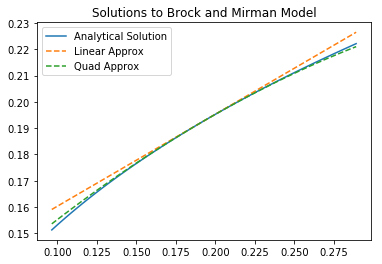

In [157]:
# Lets plot the approximations to the policy function

kgrid = np.linspace(0.5*kbar, 1.5*kbar, 50)

kopt = beta*alpha*kgrid**alpha

klin = kbar + HX*(kgrid - kbar)
kquad = klin + 0.5*HXX*(kgrid - kbar)**2

plt.plot(kgrid, kopt, label="Analytical Solution")
plt.plot(kgrid, klin, "--", label="Linear Approx")
plt.plot(kgrid, kquad, "--", label="Quad Approx")
plt.title("Solutions to Brock and Mirman Model")
plt.legend()
plt.show()

#### Exercise 5

In [2]:
# We can input our Brock and Mirman Model

# Parameters
alpha = .35
beta = .98
N = .95
sigma = .02
kbar = (beta*alpha)**(1/(1-alpha))
zbar = 0
params = (alpha, beta)

def bbm(theta, params):
    alpha, beta = params
    kpp, kp, k, zp, z = theta
    e1 = beta*alpha*(np.exp(zp)*kp**(alpha -1)*(np.exp(z)*k**(alpha) - kp))/(np.exp(zp)*kp**(alpha) - kpp) - 1
    return e1 

In [43]:
# Now we can define each of our derivatives to get F, G, H, L and M
theta = np.array([kbar, kbar, kbar, zbar, zbar])
eps = 1e-2
derivvec = np.empty_like(theta)

for i in range(len(theta)):
    thetaeps = np.zeros_like(theta)
    thetaeps[i] = 1e-2
    derivvec[i] = (bbm(theta + thetaeps, params) - bbm(theta - thetaeps, params))/(2*eps)
    
# Next, we can get HX and HZ
F, G, H, L, M = derivvec

HX = (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
HZ = -(L*N + M)/(F*N + F*HX + G)

# Now we want to get our matrix of second order derivatives

hessvec = np.empty((len(theta), len(theta)))
for i in range(len(theta)):
    for j in range(len(theta)):
        if i == j:
            thetaeps = np.zeros_like(theta)
            thetaeps[i] = 1e-2
            hessvec[i,j] = (bbm(theta + thetaeps, params) - 2*bbm(theta, params) + bbm(theta - thetaeps, params))/(eps**2)
        else:
            thetaeps1 = np.zeros_like(theta)
            thetaeps1[i] = 1e-2
            thetaeps2 = np.zeros_like(theta)
            thetaeps2[j] = 1e-2
            hessvec[i,j] = ((bbm(theta + thetaeps1 + thetaeps2, params) - bbm(theta + thetaeps1 - thetaeps2, params) - 
                           bbm(theta - thetaeps1 + thetaeps2, params) + bbm(theta - thetaeps1 - thetaeps2, params))/
                            (4*eps**2))
            

# Note here that omega and v are just 1, also note that Hv is 0
EFs = np.empty((len(theta), 3))
EFs[0,:] = (HX*HX, HX*HZ + HZ*N, 0)
EFs[1,:] = (HX, HZ, 0)
EFs[2,:] = (1, 0, 0)
EFs[3,:] = (0, N, 0)
EFs[4,:] = (0, 1, 0)

# Now we can compute lambda, and correct for the 3,3 entry
Lambda = np.dot(np.dot(EFs.T, hessvec), EFs)
Lambda[2,2] = (HZ*hessvec[0,0]*HZ)

# Next, we want to compute Fss
def funFSS(theta):
    HXX, HXZ, HZZ, HVV = theta
    Fss = np.zeros((15,3))
    Fss[0,:] = HXX*HX*HX + HX*HXX, HXX*HX*HZ + HX*HXZ + HXZ*HX*N, 0
    Fss[1,:] = HXX, HXZ, 0
    Fss[5,:] = HXX*HX*HZ + HX*HXZ + HXZ*HX*N, HXZ*N*HZ + HX*HZZ + HZZ*N*N, 0
    Fss[6,:] = HXZ, HZZ, 0
    Fss[10,:] = 0, 0, HX*HVV + HVV
    Fss[11,:] = 0, 0, HVV
    
    val = Lambda + np.dot(np.kron(np.eye(3), derivvec), Fss)
    return np.array([val[0,0], val[1,0], val[1,1], val[2,2]])
    
guess = np.ones(4)*.4

HXX, HXZ, HZZ, HVV = opt.root(funFSS, guess).x

print("HX = ", HX, "\nHZ = ", HZ, "\nHXX = ", HXX, "\nHXZ = ", HXZ, "\nHZZ = ", HZZ, "\nHVV = ", HVV)

HX =  0.348690354711 
HZ =  0.191641300154 
HXX =  -1.1832349747 
HXZ =  0.343696864196 
HZZ =  0.177721651016 
HVV =  0.103297195663


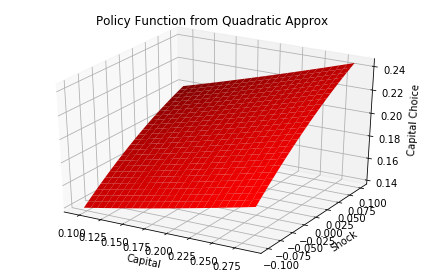

In [49]:
# Finally, we can plot our policy function

# Generating Grid
# Generate Grid for Capital
kvec = np.linspace(0.5*kbar, 1.5*kbar, 25)

# Generate Grid for Markov Process
import ar1_approx as ar1

pi, zvec = ar1.rouwen(N, 0, 5*sigma/12, 25)

# Lets generate our 3d plot.
from mpl_toolkits.mplot3d import Axes3D

# Generate Grid of Second order terms
polhess = np.empty((3,3))
polhess[0,0] = HXX
polhess[0,1] = HXZ
polhess[1,0] = HXZ
polhess[1,1] = HZZ
polhess[2,2] = HVV

kgrid, zgrid = np.meshgrid(kvec, zvec)
kprime = np.empty((25, 25))
for i in range(25):
    for j in range(25):
        vec = np.array([kvec[i] - kbar,  zvec[j], sigma])
        kprime[i,j] = kbar + HX*(kvec[i] - kbar) + HZ*zvec[j] + 0.5*(np.dot(np.dot(np.kron(np.eye(1), vec), polhess), vec.T))

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(kgrid, zgrid, kprime, rstride = 1, cstride = 1, color='r')
ax1.set_xlabel('Capital')
ax1.set_ylabel('Shock')
ax1.set_zlabel('Capital Choice')
plt.title('Policy Function from Quadratic Approx')
plt.tight_layout()
plt.show()
